# Introduction

## Aims and Goals

- The aim of this project is to investigate whether there is a correlation between the gross domestic product (GDP) of a country and the life expectancy of the people in their respective countries.

- The goal is to prepare and analyse the data using plots using Jupyter, and explain the findings from the study.

The following questions will provide answers to the aim of the project:
1. Does life expectancy increase over time across the six countries?
2. Does GDP increase over time across the six countries?
3. Is there a correlation between GDP and life expectancy of a country?
4. What is the average life expectancy of these countries?
5. What is the spread of that life expectancy?

## Data Sources
- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files
- Life expectancy data source: [WHO](https://apps.who.int/gho/data/node.main.688)

## Importing Python Modules

In [30]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.autolayout'] = False

## Loading and inspecting the CSV

In [31]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [33]:
df.head(10)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


## Exploring the Data

Identify the unique countries and years represented by the data.

In [34]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


There are a total of **6** countries: **Chile, China, Germany, Mexico, United States of America and Zimbabwe.**

In [35]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


The data ranges from **2000** to **2015**.

### Cleaning Column Name

The columns, Country, Year and GDP is easy to read, however the Life expectancy at birth (years) is too long. It will be easier to wrangle if the column name was shorter.

In [36]:
df = df.rename({"Life expectancy at birth (years)":"LEY"}, axis="columns")
df.head()

,Country,Year,LEY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Exploratory Data Analysis

To answer the questions in the introduction, we can inspect the data by summarizing and visualising it. Below is the GDP distribution. The result shows heavy right-skewness, where most values are distributed to the left.

C:\Users\Jun-Wei\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

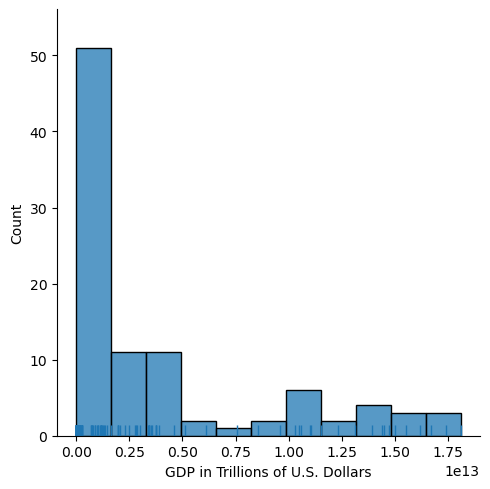

In [37]:
plt.figure(figsize=(10,8))
sns.displot(df.GDP, rug=True, kde=False)
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.show()

Below the distribution of LEY. The result displays heavy left-skewness, opposite to the GDP distribution plot. Furthermore, there seems to be three different modes of distribution groupings within the range.

C:\Users\Jun-Wei\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

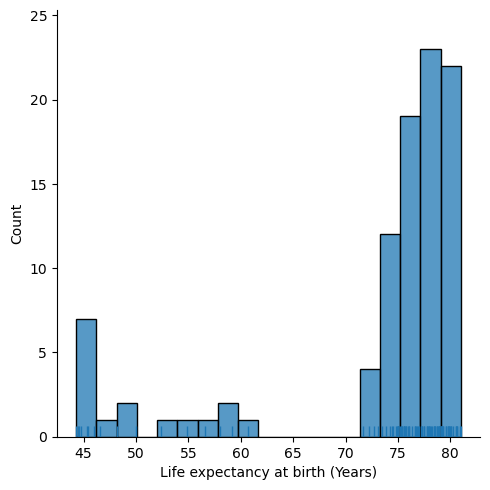

In [38]:
plt.figure(figsize=(8, 6))
sns.displot(df.LEY, rug=True, kde=False)
plt.xlabel("Life expectancy at birth (Years)")
plt.show()

Next, finding the average life expectancy and GDP by country.

In [39]:
dfMean = df.drop("Year", axis=1).groupby("Country").mean().reset_index()

In [40]:
dfMean

,Country,LEY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Below are bar plots displaying the mean values for Country and LEY by country.

The first plot displays mean life expectancy grouped by country. All countries except Zimbabwe show an average life expectancy around mid 70s and below 80. Citizens of Zimbabwe's life expectancy is around 50 years old. This may explain the skewness of the distribution plots above.

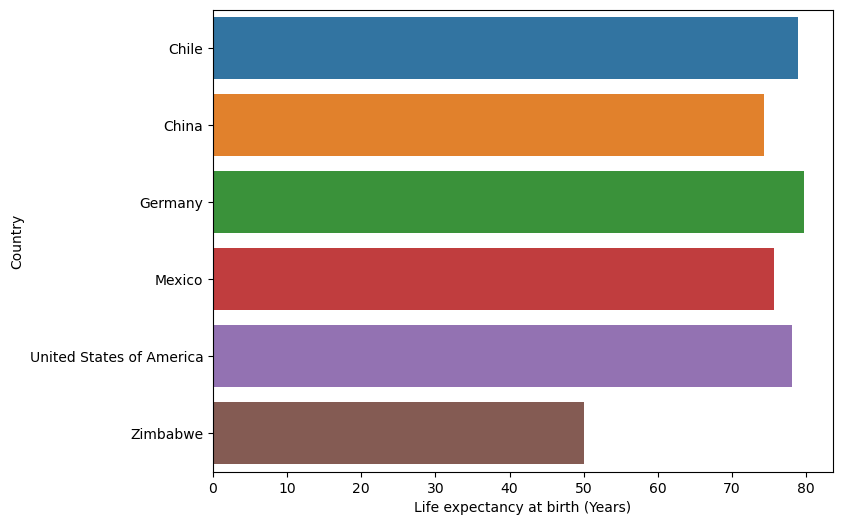

In [41]:
plt.figure(figsize=(8, 6))
sns.barplot(x="LEY", y="Country", data=dfMean)
plt.xlabel("Life expectancy at birth (Years)")
plt.show()

The second plot displays the mean GDP grouped by country. The United States of America (USA) displays a much greater value than the countries. Zimbabwe and Chile are among the lowest, which are barely visualised. China, Germany and Mexico are a lot closer to each other. The USA displays the "Power Law".

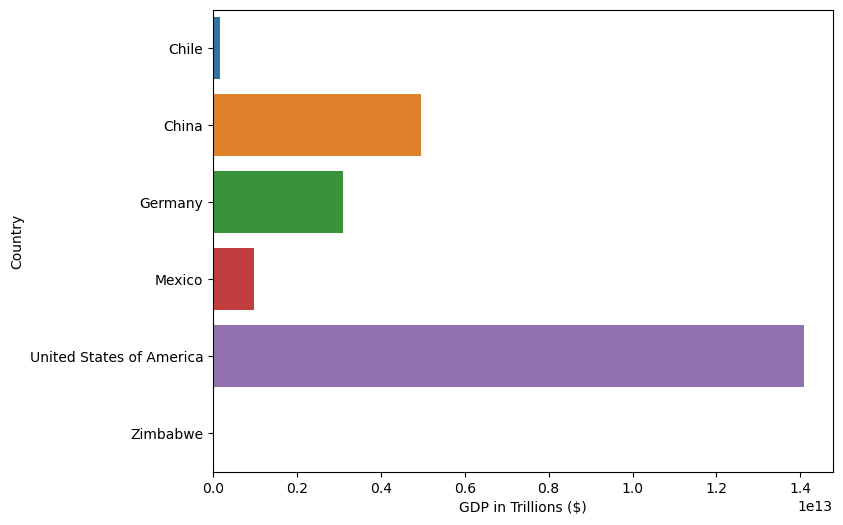

In [42]:
plt.figure(figsize=(8, 6))
sns.barplot(x="GDP", y="Country", data=dfMean)
plt.xlabel("GDP in Trillions ($)")
plt.show()

### Line Charts

The line chart below displays the the change in GDP between 2000 and 2015. Again USA shows the "Power Law". China and USA show significant increase in GDP between 2000-2015. From 2006-2015, China has shown an increase from a quarter trillion dollars to just over a trillion dollars. The other countries "seem" to not have much of an increase as both China and USA.

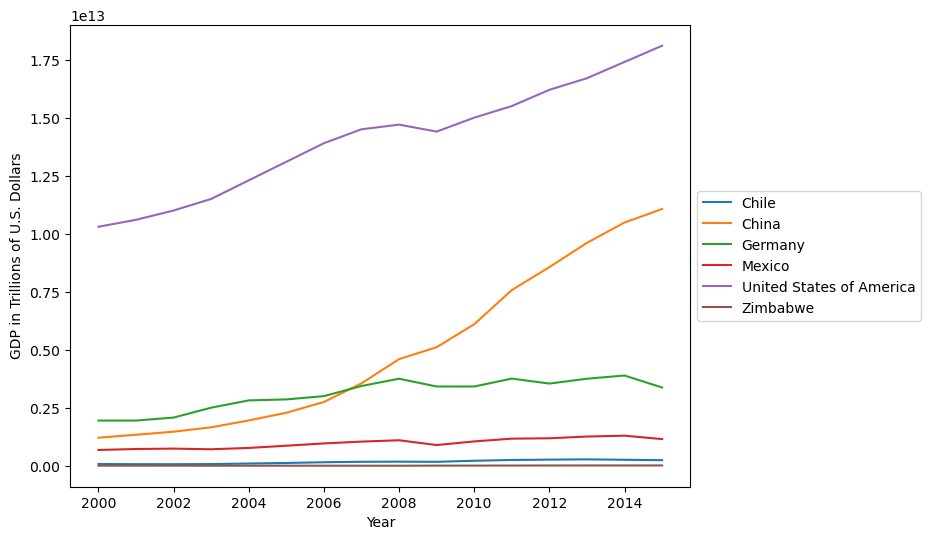

In [43]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars")
plt.show()

The first line chart requires further investigation using subplots. Below is a facet grid which displays subplots for each country and their change GDP between 2000-2015. Upon further examination, it is easier to see that the other countries that did not display much of an increase in the first line chart did, infact experience growth.

C:\Users\Jun-Wei\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


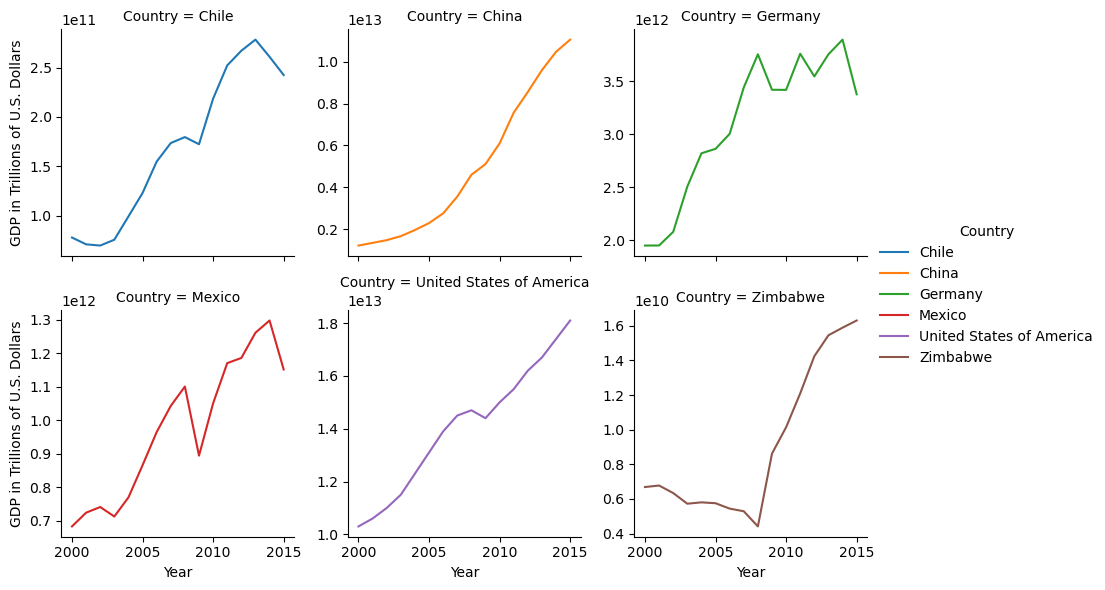

In [44]:
subGDP = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue="Country", sharey=False)

subGDP = (subGDP.map(sns.lineplot, "Year", "GDP")
         .add_legend()
         .set_axis_labels("Year", "GDP in Trillions of U.S. Dollars"))

subGDP

The following line chart below displays the life expectancy change from 2000-2015. All countries have shown an increase in life expectancy. Although Zimbabwe shows the lowest life expectancy of the 6 countries, it has shown the greatest increase from 2004 onwards.

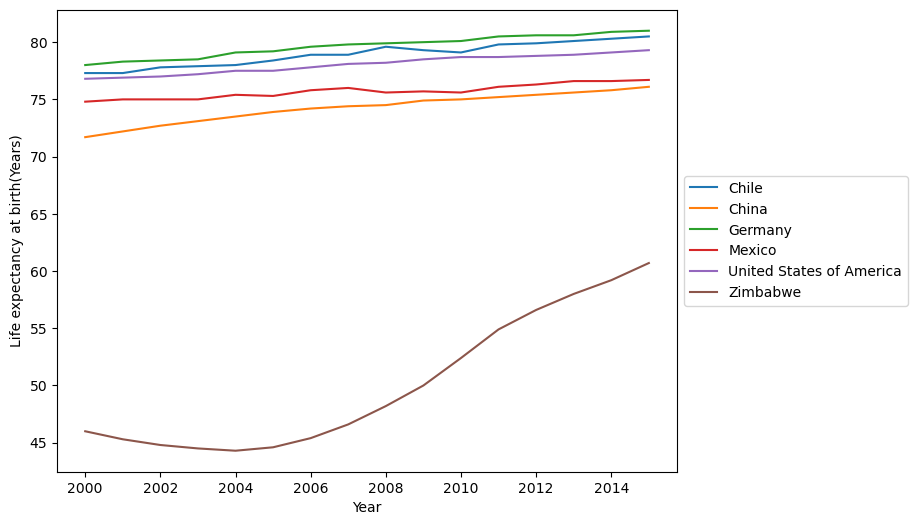

In [45]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.LEY, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5), ncol=1)
plt.ylabel("Life expectancy at birth(Years)")
plt.show()

Following the line chart of GDP, below displays a facet grid of subplots to further investigate each individual country. The linear increase displayed in the line chart above proves the increase wasn't so linear afterall. There is fluctuations across the 15 year period, where fluctuations remarkable in Chile and Mexico. Further investigation for both Chile and Mexico could prove interesting.

C:\Users\Jun-Wei\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


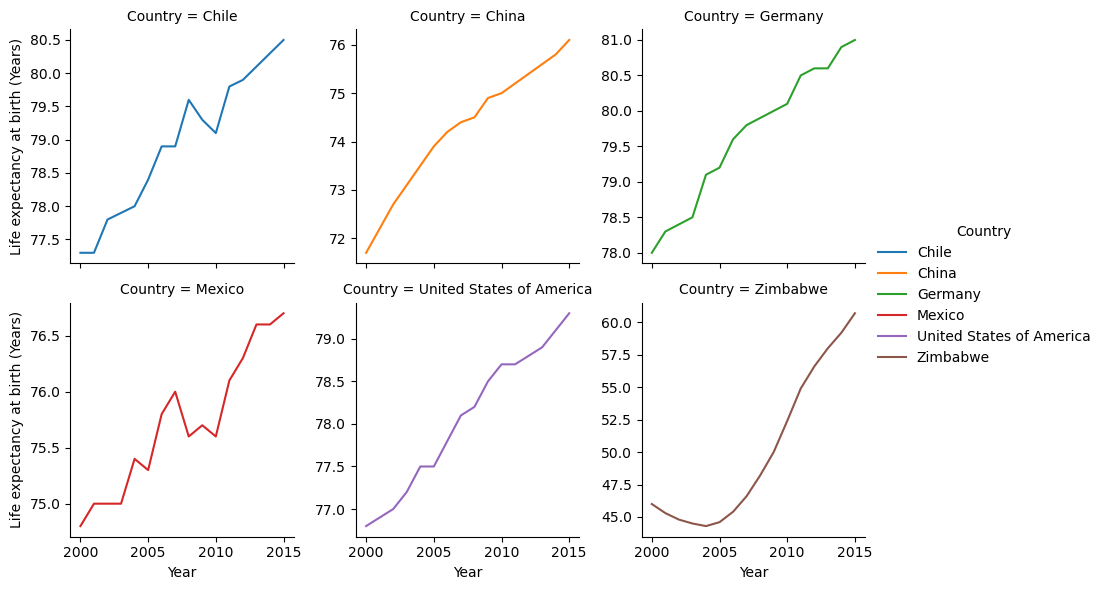

In [47]:
subLEY = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue="Country", sharey=False)
subLEY = (subLEY.map(sns.lineplot, "Year", "LEY")
         .add_legend()
         .set_axis_labels("Year", "Life expectancy at birth (Years)"))

subLEY

### Scatter Plot

Exploring the relationship between GDP and life expectancy. The scatter plot below generally shows as GDP increase, life expectancy increases. This is especially apparent in China, USA and Germany. Zimbabwe seems to not show much correlation between GDP and life expectancy. Further investigation using a facet grid is required to see if this examination is true.

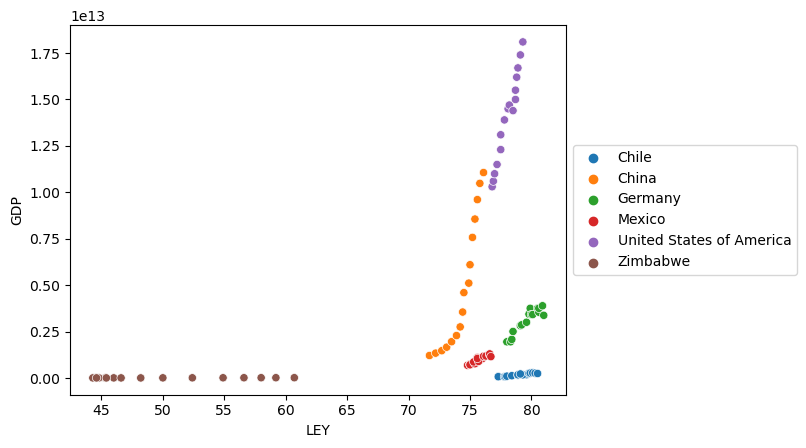

In [48]:
sns.scatterplot(x=df.LEY, y=df.GDP, hue=df.Country).legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=1)

The following facet grid displays each invididual countries and the relationship between GDP and life expectancy. Upon further examination both Germany and Chile have the highest life expectancy over 80 years old. Zimbabwe, USA and Mexico show a linear relationship between GDP and life expectancy. China displays the classic exponential curve, as GDP increases, life expectancy increases over time. From the first scatter plot above, we couldn't tell whether Zimbabwe shows

C:\Users\Jun-Wei\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


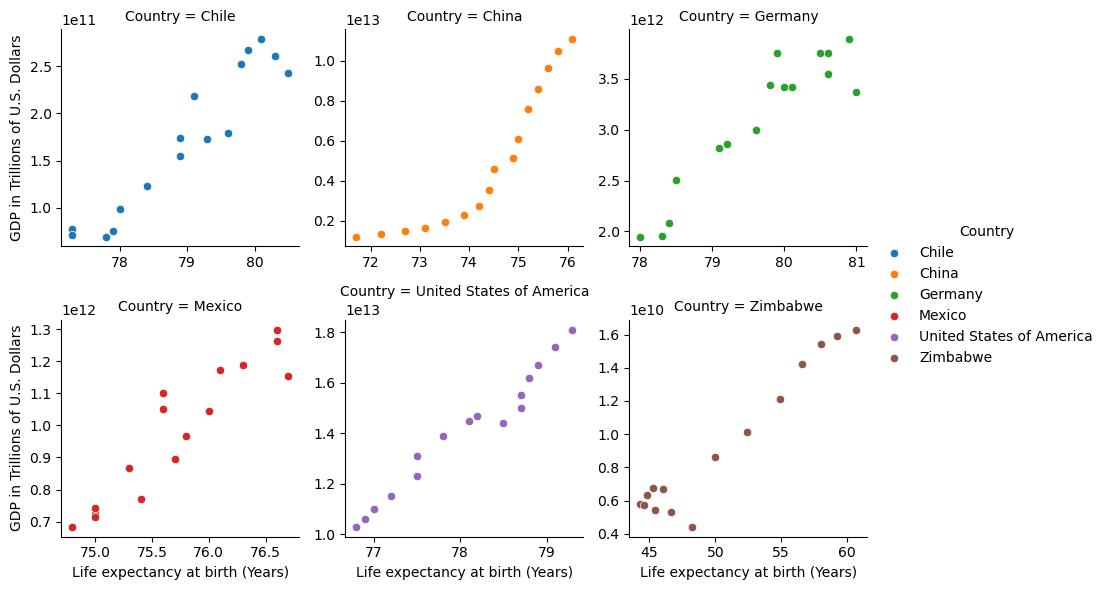

In [50]:
subScatter = sns.FacetGrid(df, col="Country", col_wrap=3,
                          hue="Country", sharey=False, sharex=False)

subScatter = (subScatter.map(sns.scatterplot, "LEY", "GDP")
             .add_legend()
             .set_axis_labels("Life expectancy at birth (Years)", "GDP in Trillions of U.S. Dollars"))